<a href="https://colab.research.google.com/github/Anjalichimnani/EVA4/blob/master/Assignment_7/EVA_S7_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
#https://modelzoo.co/model/data-augmentation-and-sampling-for-pytorch

In [0]:
# Mouting Drive location where all the modularized code is present
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
# Mapping the Drive location so that the files are loaded
import sys
sys.path.append('/content/drive/My Drive/EVA4/Assignment_7/python_files/')
from all_imports import *
import get_train_test as tt
import train_test_loader as ttl
import get_model as gm
import train_test_def as ttd


CUDA Available? True


In [0]:
# Test whether CUDA is available or not and the Device being used
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

True
0
Tesla K80


In [0]:
# Define the data sets 
#    - Both Train and Test data set
#    - Along with Transforms defined on it that are different for train and Test

train = tt.get_train('CIFAR10')
test = tt.get_test('CIFAR10')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
# Load the respective data
train_loader, test_loader = ttl.get_train_test_loader(train,test)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
# Check the Model Summary - Parameters used and memory consumed. 
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = gm.get_model_instance(0.10).to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          18,432
      BatchNorm2d-10           [-1, 64, 32, 32]             128
             ReLU-11           [-1, 64, 32, 32]               0
          Dropout-12           [-1, 64, 32, 32]               0
        MaxPool2d-13           [-1, 64, 16, 16]               0
           Conv2d-14           [-1

In [0]:
# Run the Model and obtain the Train/Test Accuracy and Loss
#   Dropout Rate used is 0.1 which is passed as parameter to the model
#   Regulariation can be added to the code
train_losses = []
test_losses = []
train_acc = []
test_acc = []

model = gm.get_model_instance(0.1).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = StepLR(optimizer, step_size=15, gamma=0.1)

EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    a,b = ttd.train(model, device, train_loader, optimizer, epoch)
    train_losses.extend(a)
    train_acc.extend(b)
    c,d = ttd.test(model, device, test_loader)
    test_losses.extend(c)
    test_acc.extend(d)
    scheduler.step()
    print('')

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.3540095090866089 Batch_id=390 Accuracy=38.58: 100%|██████████| 391/391 [00:27<00:00, 15.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.3343, Accuracy: 5089/10000 (50.89%)


EPOCH: 2


Loss=1.0459405183792114 Batch_id=390 Accuracy=54.35: 100%|██████████| 391/391 [00:27<00:00, 15.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2505, Accuracy: 5518/10000 (55.18%)


EPOCH: 3


Loss=0.9359856843948364 Batch_id=390 Accuracy=63.30: 100%|██████████| 391/391 [00:27<00:00, 15.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9627, Accuracy: 6625/10000 (66.25%)


EPOCH: 4


Loss=0.7170007824897766 Batch_id=390 Accuracy=68.65: 100%|██████████| 391/391 [00:27<00:00, 14.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9743, Accuracy: 6658/10000 (66.58%)


EPOCH: 5


Loss=0.7400734424591064 Batch_id=390 Accuracy=71.85: 100%|██████████| 391/391 [00:27<00:00, 14.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8510, Accuracy: 6982/10000 (69.82%)


EPOCH: 6


Loss=0.9299110174179077 Batch_id=390 Accuracy=74.08: 100%|██████████| 391/391 [00:27<00:00, 15.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7818, Accuracy: 7312/10000 (73.12%)


EPOCH: 7


Loss=0.9377220869064331 Batch_id=390 Accuracy=75.73: 100%|██████████| 391/391 [00:27<00:00, 14.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7272, Accuracy: 7515/10000 (75.15%)


EPOCH: 8


Loss=0.6936353445053101 Batch_id=390 Accuracy=77.16: 100%|██████████| 391/391 [00:27<00:00, 14.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7821, Accuracy: 7370/10000 (73.70%)


EPOCH: 9


Loss=0.4745517671108246 Batch_id=390 Accuracy=77.94: 100%|██████████| 391/391 [00:27<00:00, 15.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7332, Accuracy: 7373/10000 (73.73%)


EPOCH: 10


Loss=0.5178934931755066 Batch_id=390 Accuracy=79.15: 100%|██████████| 391/391 [00:27<00:00, 15.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6220, Accuracy: 7813/10000 (78.13%)


EPOCH: 11


Loss=0.5574877858161926 Batch_id=390 Accuracy=79.83: 100%|██████████| 391/391 [00:27<00:00, 14.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6513, Accuracy: 7778/10000 (77.78%)


EPOCH: 12


Loss=0.4970424771308899 Batch_id=390 Accuracy=80.46: 100%|██████████| 391/391 [00:27<00:00, 15.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6403, Accuracy: 7829/10000 (78.29%)


EPOCH: 13


Loss=0.5650467872619629 Batch_id=390 Accuracy=80.97: 100%|██████████| 391/391 [00:27<00:00, 14.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5978, Accuracy: 7966/10000 (79.66%)


EPOCH: 14


Loss=0.4450356960296631 Batch_id=390 Accuracy=81.60: 100%|██████████| 391/391 [00:27<00:00, 15.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6359, Accuracy: 7805/10000 (78.05%)


EPOCH: 15


Loss=0.459867388010025 Batch_id=390 Accuracy=82.02: 100%|██████████| 391/391 [00:27<00:00, 14.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6018, Accuracy: 7874/10000 (78.74%)


EPOCH: 16


Loss=0.5499507784843445 Batch_id=390 Accuracy=84.86: 100%|██████████| 391/391 [00:27<00:00, 15.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4940, Accuracy: 8322/10000 (83.22%)


EPOCH: 17


Loss=0.47467416524887085 Batch_id=390 Accuracy=85.70: 100%|██████████| 391/391 [00:27<00:00, 15.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4930, Accuracy: 8346/10000 (83.46%)


EPOCH: 18


Loss=0.3417477607727051 Batch_id=390 Accuracy=85.90: 100%|██████████| 391/391 [00:27<00:00, 15.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4894, Accuracy: 8382/10000 (83.82%)


EPOCH: 19


Loss=0.31647616624832153 Batch_id=390 Accuracy=86.21: 100%|██████████| 391/391 [00:27<00:00, 14.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4932, Accuracy: 8359/10000 (83.59%)


EPOCH: 20


Loss=0.37073224782943726 Batch_id=390 Accuracy=86.45: 100%|██████████| 391/391 [00:27<00:00, 15.50it/s]



Test set: Average loss: 0.4877, Accuracy: 8342/10000 (83.42%)




Text(0.5, 1.0, 'Test Accuracy')

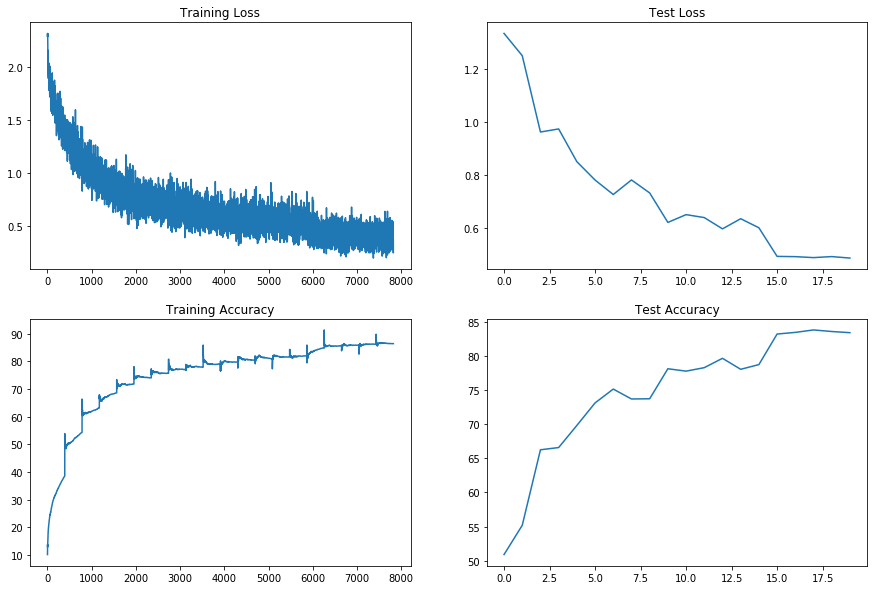

In [0]:
# Visualize the Training/Test Accuracy/Loss using Matplotlib

fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")